## Suport Vector Machine

 _Prática da aula sobre  **SVM** aplicada a dados ficticios relacionando idade e receita, com base no que foi visto em aula, onde os dados foram gerados com outros parâmetros e testados com outros kernels do SVC_

Gerando dados falos de receita e idade

In [23]:
import numpy as np

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    np.random.seed(1234)
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

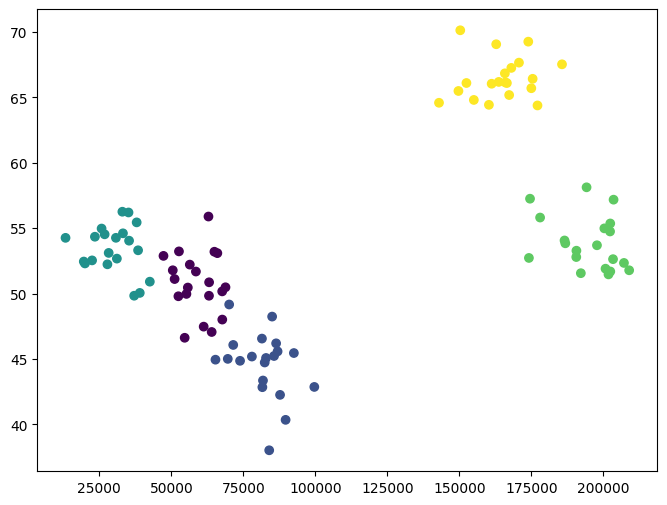

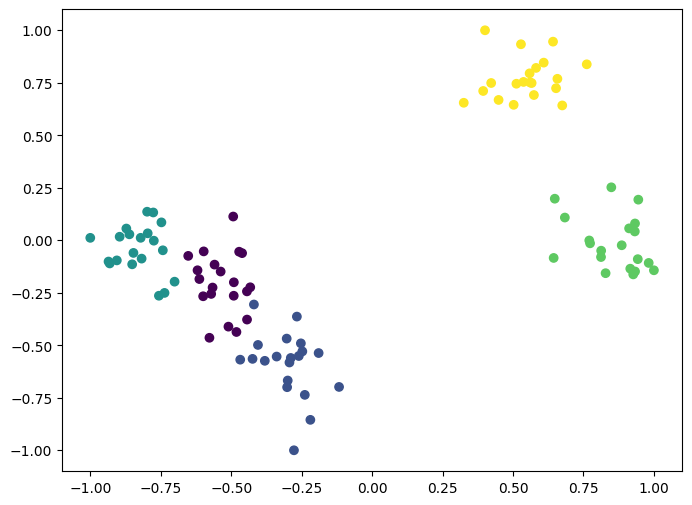

In [24]:
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler

(X, y) = createClusteredData(100, 5)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

Utilizando o SVM SVC com Kernel Linear

In [25]:
from sklearn import svm, datasets

C = 1.0 # Ajuste o parâmetro de regularização
svc = svm.SVC(kernel='linear', C=C).fit(X, y) # Treina o modelo SVM com kernel linear

Criando uma grade de pontos, é possivel gerar um gráfico cluster com áreas

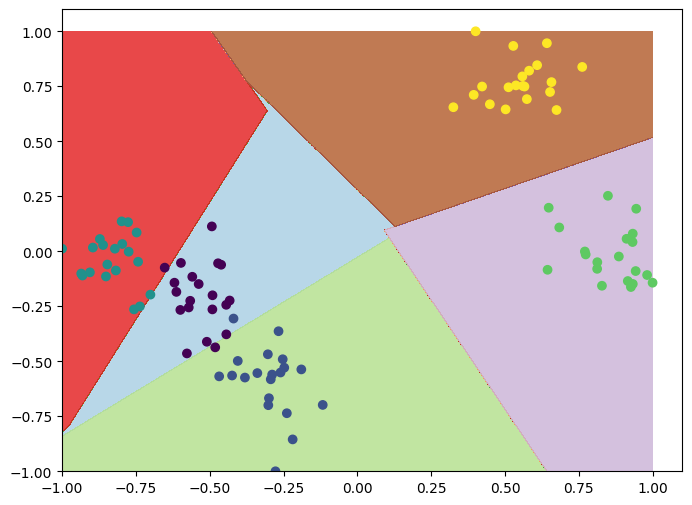

In [26]:
def plotPredictions(clf):
    # Cria uma grade densa de pontos para amostragem
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))
    
    # Converte para arrays Numpy
    npx = xx.ravel()
    npy = yy.ravel()
    
    # Converte para uma lista de pontos 2D (renda, idade)
    samplePoints = np.c_[npx, npy]
    
    # Gera rótulos previstos (números dos clusters) para cada ponto
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) # Redimensiona os resultados para corresponder à dimensão de xx
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # Desenha o contorno
    plt.scatter(X[:,0], X[:,1], c=y.astype(float)) # Desenha os pontos
    plt.show()
    
plotPredictions(svc)

Predição por pontos especificos

In [27]:
print(svc.predict(scaling.transform([[200000, 40]]))) # Previsão para renda 200000 e idade 40

[3]


In [28]:
print(svc.predict(scaling.transform([[50000, 65]]))) # Previsão para renda 50000 e idade 65

[2]


Utilizando outros kernels para efeito de comparação

In [29]:
C = 1.0 # Ajuste o parâmetro de regularização
svc = svm.SVC(kernel='poly', C=C).fit(X, y) # Treina o modelo SVM com kernel polinomial

Kernel Polinomial Modela os dados em um espaço de dimensão usando funções polinomiais. Resultados semelhantes ao modelo linear mas pior

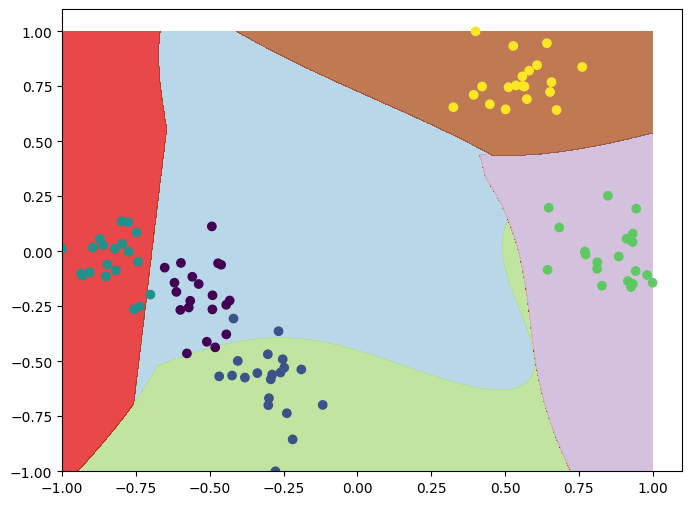

In [30]:
plotPredictions(svc)

In [31]:
C = 1.0 # Ajuste o parâmetro de regularização
svc = svm.SVC(kernel='rbf', C=C).fit(X, y) # Treina o modelo SVM com kernel rbf

RBF, ou Kernel Gaussiano, mapeia os dados em um espaço infinito de dimensões, sendo flexivel em sua modelagem. Resultados bons e semelhantes ao linear, e melhor que o polinomial

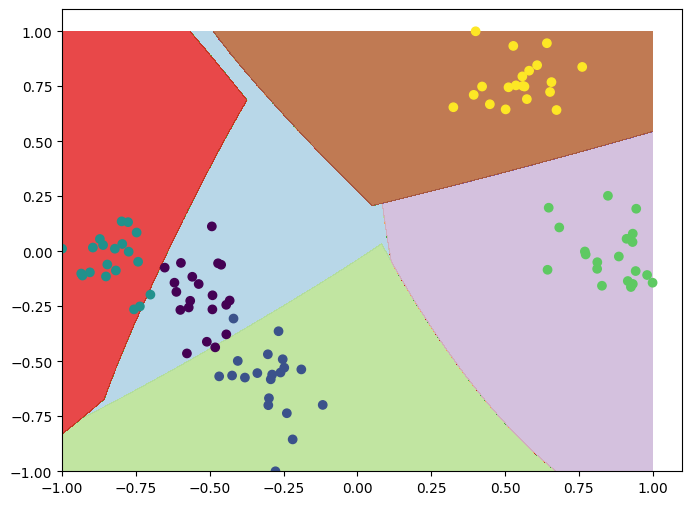

In [32]:
plotPredictions(svc)

In [33]:
C = 1.0 # Ajuste o parâmetro de regularização
svc = svm.SVC(kernel='sigmoid', C=C).fit(X, y) # Treina o modelo SVM com kernel sigmoidal

Ficou Instável, kernel utilizado para relações complexas e especificas

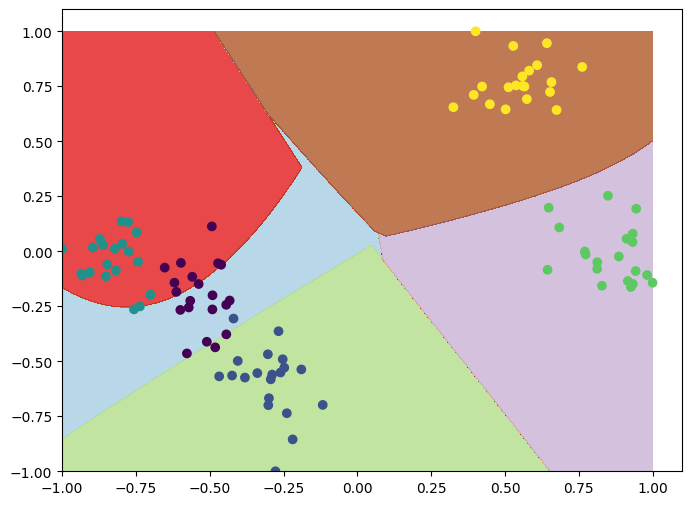

In [34]:
plotPredictions(svc)